In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [3]:
df=pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df=df.drop(["id"],axis="columns")

In [10]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder() 
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["work_type"]=le.fit_transform(df["work_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [11]:
df = df.dropna(axis=0, subset=['bmi'])

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [13]:
df.reset_index(drop=True, inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=["age","avg_glucose_level","bmi"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
2,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
3,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1
4,1,0.987793,0,0,1,2,1,0.605161,0.214204,1,1


In [34]:
df["stroke"].value_counts()
#this data is totally imbalanced!!!
#lets create a new balanced database

0    4700
1     209
Name: stroke, dtype: int64

In [44]:
df_new1=df[df["stroke"]==0]
df_new2=df[df["stroke"]==1]

In [50]:
df_new1.shape
df_new2.shape
df_new1_final=df_new1.sample(300)

In [55]:
df_fotrain=pd.concat([df_new1_final,df_new2],axis=0)
df_fotrain.shape

(509, 11)

In [61]:
df_fotrain.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3302,0,0.768066,1,1,0,0,1,0.550780,0.160367,2,0
2534,0,0.084473,0,0,0,4,0,0.275598,0.263459,0,0
1822,0,0.523926,0,0,1,2,0,0.169790,0.256586,1,0
4553,1,0.755859,0,0,1,0,0,0.051149,0.225659,0,0
3788,1,0.914551,0,0,1,2,0,0.194350,0.207331,2,0


In [64]:
inputs=df_fotrain.drop(["stroke"],axis="columns")
output=df_fotrain["stroke"]

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,output, test_size=0.1, random_state=1)

In [91]:
import tensorflow as tf
from tensorflow import keras
es=tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(inputs,output,epochs=50,batch_size=4,callbacks=[es])

Epoch 1/50
128/128 [==============================] - 1s 1ms/step - loss: 0.6530 - accuracy: 0.6246
Epoch 2/50
128/128 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.6835
Epoch 3/50
128/128 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.6843
Epoch 4/50
128/128 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7885
Epoch 5/50
128/128 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7345
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7277
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7854
Epoch 8/50
128/128 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7114
Epoch 9/50
128/128 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7563
Epoch 10/50
128/128 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7151

In [98]:
y_pred=model.predict(x_test).flatten()
y_pred=np.round(y_pred)

In [100]:
y_pred[:10]


array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [101]:
y_test[:10]
# all values matched in this small lot. Lol we got lucky i guess !!!
#Lets run out a classification report

144     1
44      1
3748    0
1919    0
63      1
4728    0
3174    0
4611    0
3731    0
1423    0
Name: stroke, dtype: int64

In [103]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))
#hmmn the f1 score is pretty good. Also we have used a deep learning model on a small sample. So....:)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.84      0.75      0.79        28

    accuracy                           0.78        51
   macro avg       0.79      0.79      0.78        51
weighted avg       0.79      0.78      0.78        51



In [108]:
cf=confusion_matrix(y_test,y_pred)
print(cf)
#Hmmn not interesting....lets make it visually appealing:)

[[19  4]
 [ 7 21]]


<AxesSubplot:>

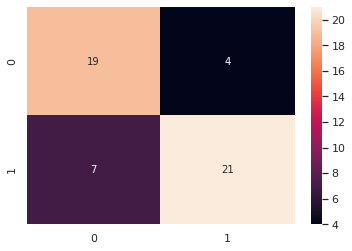

In [107]:
import seaborn as sns
sns.heatmap(cf, annot=True)
#so out of 51 times, we predicted 40 times right!